In [56]:
import pandas as pd 
pd.read_excel('E:\Python_data\WTHT.xlsx')


,Unnamed: 0,Gender,Height,Weight
0,0,MALE,73.847017,241.893563
1,1,MALE,68.781904,162.310473
2,2,MALE,74.110105,212.740856
3,3,MALE,71.730978,220.042470
4,4,MALE,69.881796,206.349801
5,5,MALE,67.736473,145.899800
6,6,MALE,66.243253,150.765476
7,7,MALE,70.536890,210.643788
8,8,MALE,72.647839,215.564365
9,9,MALE,64.342689,152.657329


In [57]:
pd.__version__

'1.5.3'

In [58]:
import pandas as pd 
df=pd.read_excel('E:\Python_data\WTHT.xlsx',index_col=0)
df.head()

,Gender,Height,Weight
0,MALE,73.847017,241.893563
1,MALE,68.781904,162.310473
2,MALE,74.110105,212.740856
3,MALE,71.730978,220.042470
4,MALE,69.881796,206.349801


In [ ]:
#Exploratory Data analysis
#Dependent Variable Weight & Independent Variable Height

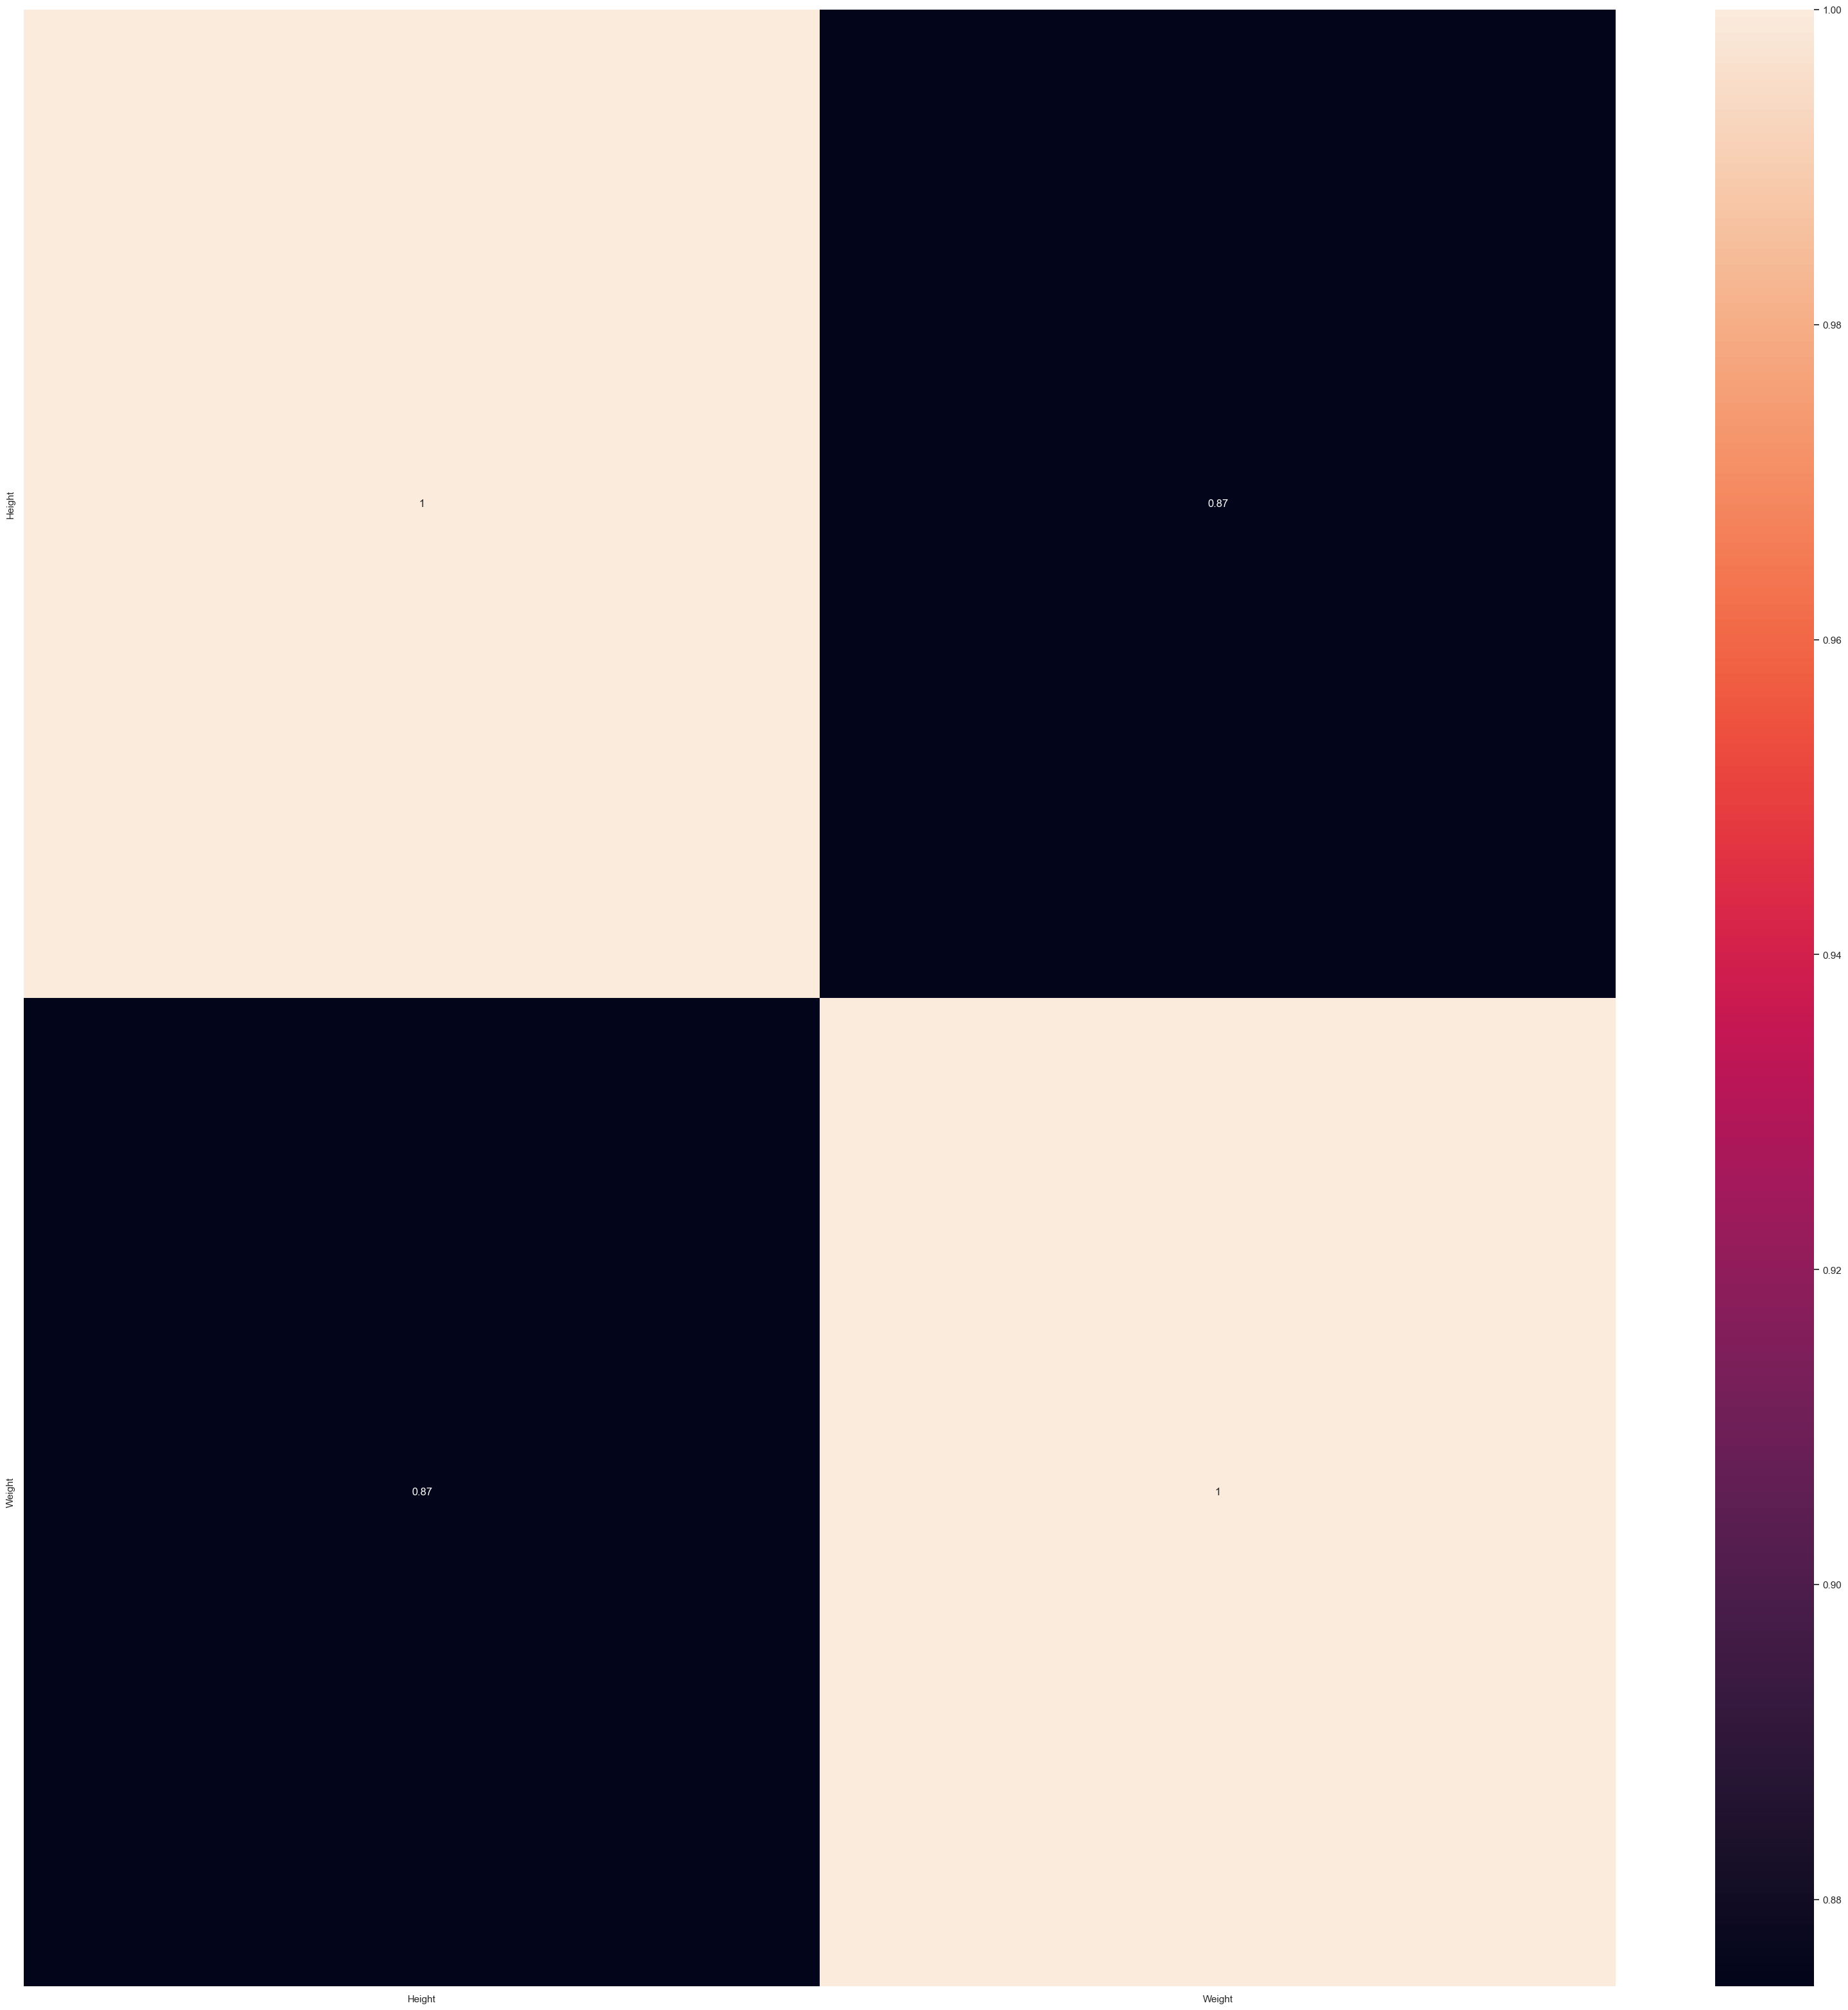

In [59]:
import seaborn as sns;
dff = df[['Height','Weight']]
#Visualizing the data using heatmap
sns.heatmap(dff.corr(), annot = True)
sns.set(rc={'figure.figsize':(40,40)})



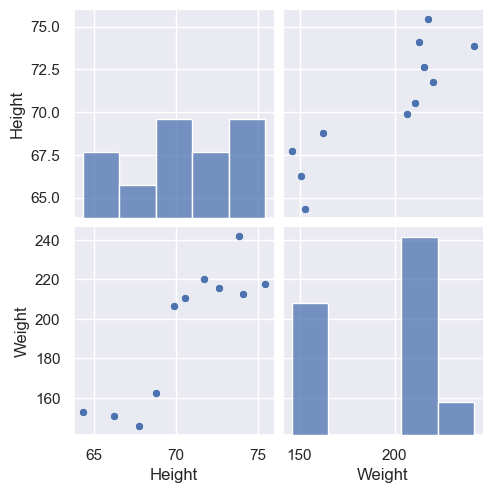

In [60]:
#seaborn visualization library
import seaborn as sns
#creat the default pairplot
sns.pairplot(df[['Height','Weight']])


In [64]:
#create array for dependent and independent variables
x=df.iloc[:,1:2].values
y=df.iloc[:,2].values
#splitting the variables as trainig and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3, random_state=100)
print('Row count of x_train table'+' - '+str(f"{len(x_train):,}"))
print('Row count of y_train table'+' - '+str(f"{len(y_train):,}"))
print('Row count of x_test table'+' - '+str(f"{len(x_test):,}"))
print('Row count of y_test table'+' - '+str(f"{len(y_test):,}"))
                                                   

Row count of x_train table - 7
Row count of y_train table - 7
Row count of x_test table - 4
Row count of y_test table - 4


In [ ]:
#We are first splitting the dataset into train and test data sets. We will build 
#the model based on the train data set and test it on the test dataset.
#Build a simple Linear Regression Model

#Now, we are ready to build a simple linear regression model. Remember,
#the regression model predicts the continuous variables only. Like weight, 
#sales, the number of births, etc. So, we should choose a regression model only when
#we have continuous dependent and independent variables.

#How do we build the model? What packages do we need? We will be using existing python packages to build the model.

In [ ]:
#Below are two packages
    #Sklearn
    #Statsmodel
    #Below is theequation for the simple linear regression:
    # y = a + bx  y is Weight a dependent variable and x is height indepedent variable a is intercept and b is slope of the line

In [ ]:
#Add intercept to the model
#The Statsmodel library that we will be using for building the linear regression
#model will fit a line for our dataset. Now, let's input the intercept value using the Statsmodel library.

In [65]:
#Importing Statsmodels.api library from stamodel package
import statsmodels.api as sm
# Adding a comment to get an intercept
x_train_sm= sm.add_constant(x_train)
print('Intercept added to the linear regression model -'+str(x_train_sm))

Intercept added to the linear regression model -[[ 1.       69.881796]
 [ 1.       74.110105]
 [ 1.       73.847017]
 [ 1.       70.53689 ]
 [ 1.       71.730978]
 [ 1.       75.436898]
 [ 1.       72.647839]]


In [ ]:
#Fit the regression line
#Now, let’s fit the regression line using the stats model.

In [66]:
#Fitting the regression lline using OLS
lr=sm.OLS(y_train,x_train_sm).fit()
#printing the parameters
lr.params
#linear regression summary
lr.summary()


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1.460
Date:                Sat, 25 Mar 2023   Prob (F-statistic):              0.281
Time:                        22:12:12   Log-Likelihood:                -25.614
No. Observations:                   7   AIC:                             55.23
Df Residuals:                       5   BIC:                             55.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9562    163.826      0.122      0.908    -401.173     441.085
x1             2.7260      2.256      1.208      0.281      -3.073       8.525
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.641
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.042
Skew:                           1.296   Prob(JB):                        0.360
Kurtosis:                       3.536   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

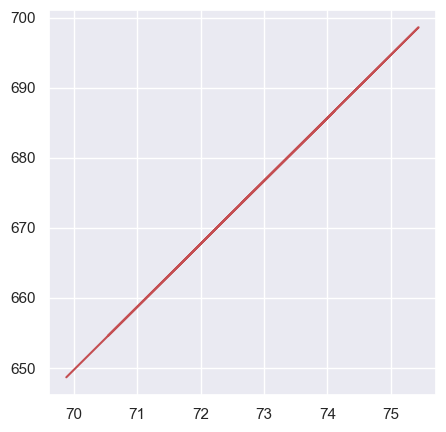

In [67]:
#nderstand the results

#Based on the summary, we can now derive the linear regression equation using intercept and slope.

#Weight = -423.3627 + 2.7260 * height

#Plot the regression line using the equation:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.plot(x_train,19.9562 + 8.9965 *x_train,'r')
plt.show()
    

In [68]:
#Now predict the weight based on the height in the test dataset
#Adding a constant to x_test
x_test_sm=sm.add_constant(x_test)
#predeicting the y values corresponding to x_rest_sm
y_test_pred=lr.predict(x_test_sm)
#printing first 15 prdicted values
y_test_pred

array([195.35426656, 200.53520126, 207.45556019, 204.6057168 ])